In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd
from igraph import Graph, ALL
import numpy as np

from util.graph_helper import GraphHelper
from agents.greedy import NaiveAgent, DSaturAgent
from agents.dummy_agent import DummyAgent
from environment import Environment
from system import System

rd.seed(0)

# Check performance of agents

In [2]:
sys = System(antennas=10)
data = sys.get_antennas()

Dir  {'deg': 172, 'rad': 3.0019663134302466} {'x': 0, 'y': 0}


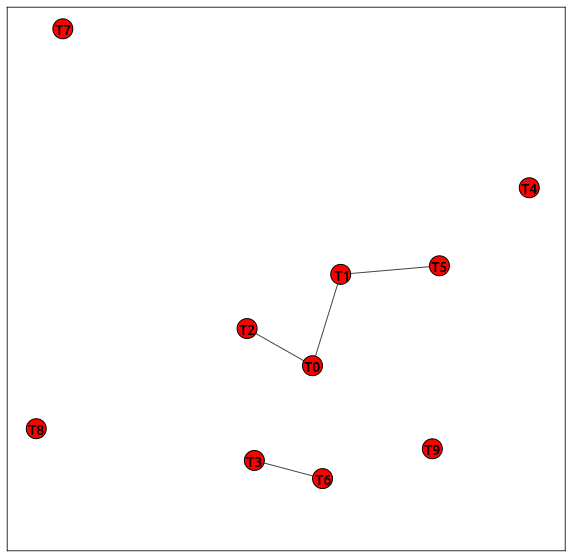

In [3]:
naive = NaiveAgent(data, 0.1)
dSatur = DSaturAgent(data, 0.1)

g = naive.get_graph()
fig, ax = GraphHelper.plot(g)
fig

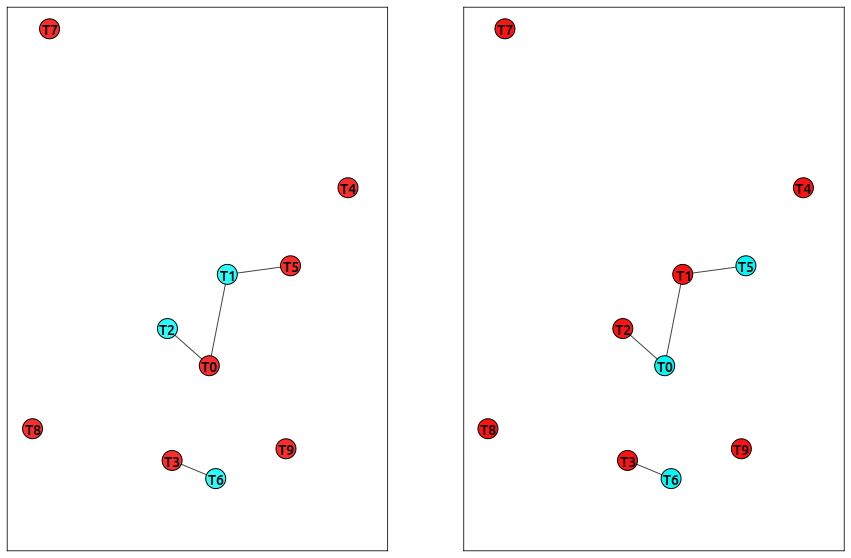

In [4]:
naive.solve()
dSatur.solve()
gn = naive.get_graph()
gd = dSatur.get_graph()

figsize=(15,10)
fig, axs = plt.subplots(1, 2, figsize=figsize)
GraphHelper.plot(gn, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(gd, figsize, fig=fig, ax=axs[1])
fig

# Check Spectrum Analyzer

In [5]:
from spectrum_analyzer import SpectrumAnalyzer
from igraph import plot

sys = System(antennas=10)
data1 = sys.get_antennas()

sys = System(antennas=10)
data2 = sys.get_antennas()

sys = System(antennas=10)
data3 = sys.get_antennas()

dummy = DummyAgent(data1, 0.1)
naive = NaiveAgent(data2, 0.1)
dsatur = DSaturAgent(data3, 0.1)
dummy.solve()
naive.solve()
dsatur.solve()

g1 = dummy.get_graph()
g2 = naive.get_graph()
g3 = dsatur.get_graph()

spec1 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec2 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))
spec3 = SpectrumAnalyzer(((0,0), (1,0), (1,1), (0,1)), speed=0.2, initial_position=(0.6, 0.7))

Dir  {'deg': 172, 'rad': 3.0019663134302466} {'x': 0, 'y': 0}
Dir  {'deg': 172, 'rad': 3.0019663134302466} {'x': 0, 'y': 0}
Dir  {'deg': 172, 'rad': 3.0019663134302466} {'x': 0, 'y': 0}


In [6]:
for i in range(1):
    spec1.record_signals(data1)
    spec2.record_signals(data2)
    spec3.record_signals(data3)
    g1.add_vertex(x=spec1.position['x'], y=spec1.position['y'], color='grey', label="{}".format(i))
    g2.add_vertex(x=spec2.position['x'], y=spec2.position['y'], color='grey', label="{}".format(i))
    g3.add_vertex(x=spec3.position['x'], y=spec3.position['y'], color='grey', label="{}".format(i))
    spec1.move()
    spec2.move()
    spec3.move()

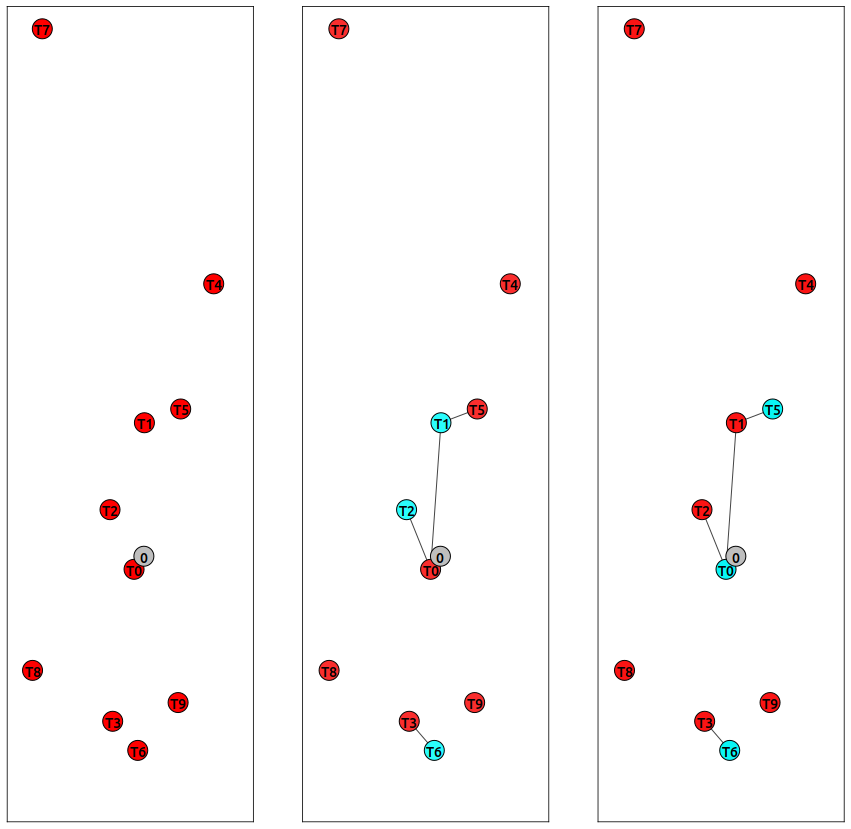

In [7]:
figsize=(15,15)
fig, axs = plt.subplots(1, 3, figsize=figsize)
GraphHelper.plot(g1, figsize, fig=fig, ax=axs[0])
GraphHelper.plot(g2, figsize, fig=fig, ax=axs[1])
GraphHelper.plot(g3, figsize, fig=fig, ax=axs[2])
fig

In [8]:
print("Frequencies in dummy agent: {}\nFrequencies in naive agent: {}\nFrequencies in dsatur agent: {}".format(
        dummy.get_frequencies(), naive.get_frequencies(), dsatur.get_frequencies()))

Frequencies in dummy agent: 1
Frequencies in naive agent: 2
Frequencies in dsatur agent: 2


In [9]:
print("Overlapping in dummy agent: {}\nOverlapping in naive agent: {}\nOverlapping in dsatur agent: {}".format(
        spec1.get_overlapping(), spec2.get_overlapping(), spec3.get_overlapping()))

Overlapping in dummy agent: 0
Overlapping in naive agent: 0
Overlapping in dsatur agent: 0


# Check simulator performance

In [10]:
sys = System()
env = Environment.create(sys, 'naive', limit_time=10)

Dir  {'deg': 172, 'rad': 3.0019663134302466} {'x': 0, 'y': 0}


In [11]:
env.start()

Dir  {'deg': 243, 'rad': 4.241150082346221} {'x': 0, 'y': 0}
{'x': 0, 'y': 0}
{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
Dir  {'deg': 197, 'rad': 3.438298626428829} {'x': 0, 'y': 0}
{'x': 0, 'y': 0}
{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
Dir  {'deg': 335, 'rad': 5.8468529941810035} {'x': 0, 'y': 0}
{'x': 0, 'y': 0}
{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]} 0
Dir  {'deg': 338, 'ra

# Cognitive agent

In [12]:
list(g.get_adjacency())

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [13]:
from math import log10

In [14]:
u = 5.05
ro = 15.07
L_0 = 0
n = 0
d_0 = 1
d = 1

In [15]:
L = L_0 + 10 * n * log10(d / d_0)
print(L)

0.0


In [16]:
t = {'x': 1, 'y': 1}
t1 = {'x': 1, 'y': 1}
m_frequency = 9e8

loss = 0.0
fmhz = m_frequency / 1e6
dist = GraphHelper.calc_distance(t, t1) / 1000

if m_frequency <= 1.500e9:
    # standard Okumura Hata
    # see eq. (4.4.1) in the COST 231 final report
    log_f = log10 (fmhz);
    hb = max([t, t1], key=lambda a: a['y'])['y']
    hm = min([t, t1], key=lambda a: a['y'])['y']

    log_aHeight = 13.82 * log10 (hb)
    log_bHeight = 0.0

    if fmhz < 200:
        log_bHeight = 8.29 ** log10 (1.54 * hm) -  1.1
    else:
        log_bHeight = 3.2 ** log10(11.75 * hm) - 4.97

    loss = 69.55 + (26.16 * log_f) - log_aHeight + (((44.9 - (6.55 * log10(hb)))) * log10(dist)) - log_bHeight
    loss += -4.70 ** (log10 (fmhz), 2) + 18.33 * log10 (fmhz) - 40.94;
else:
    # COST 231 Okumura model
    # see eq. (4.4.3) in the COST 231 final report

    log_f = log10 (fmhz)
    hb = max([t, t1], key=lambda a: a['y'])['y']
    hm = min([t, t1], key=lambda a: a['y'])['y']

    log_aHeight = 13.82 * log10(hb)
    log_bHeight = 3.2 ** ((log10 (11.75 * hm)), 2)
    C = 3

    loss = 46.3 + (33.9 * log_f) - log_aHeight + (((44.9 - (6.55 * log10 (hb)) )) * log10(dist)) - log_bHeight + C

print(loss)

ValueError: math domain error

In [87]:
def log_propagation(t, t1, txPowerDbm=50):
    m_frequency = 9e8
    m_referenceDistance = 1
    m_exponent = 3
    m_referenceLoss=46.6777

    distance = GraphHelper.calc_distance(t, t1)

    if distance <= m_referenceDistance:
        return [distance, txPowerDbm - m_referenceLoss]

    pathLossDb = 10 * m_exponent * log10 (distance / m_referenceDistance);
    rxc = -m_referenceLoss - pathLossDb;

    return [distance, txPowerDbm + rxc]

In [85]:
data = [log_propagation({'x': 0, 'y': 0}, {'x': x, 'y': y}) for x in np.linspace(0, 1, 10) for y in np.linspace(0, 1, 10) ]

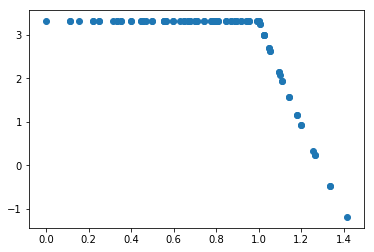

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
s = np.array(data)
plt.scatter(s[:,0], s[:,1])
plt.show()

In [83]:
data

[[0.0, 3.3222999999999985],
 [0.1111111111111111, 3.3222999999999985],
 [0.2222222222222222, 3.3222999999999985],
 [0.3333333333333333, 3.3222999999999985],
 [0.4444444444444444, 3.3222999999999985],
 [0.5555555555555556, 3.3222999999999985],
 [0.6666666666666666, 3.3222999999999985],
 [0.7777777777777777, 3.3222999999999985],
 [0.8888888888888888, 3.3222999999999985],
 [1.0, 3.3222999999999985],
 [0.1111111111111111, 3.3222999999999985],
 [0.15713484026367722, 3.3222999999999985],
 [0.24845199749997662, 3.3222999999999985],
 [0.35136418446315326, 3.3222999999999985],
 [0.4581228472908512, 3.3222999999999985],
 [0.5665577237325317, 3.3222999999999985],
 [0.6758625033664688, 3.3222999999999985],
 [0.7856742013183861, 3.3222999999999985],
 [0.8958064164776166, 3.3222999999999985],
 [1.0061539042374907, 3.2423674974239916],
 [0.2222222222222222, 3.3222999999999985],
 [0.24845199749997662, 3.3222999999999985],
 [0.31426968052735443, 3.3222999999999985],
 [0.40061680838488767, 3.32229999999